In [2]:
import os 
import cv2
import datetime
import csv

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
IMG_DIR = '../Teeth'

# Load test Image
image = cv2.imread(IMG_DIR + '/1435_008251.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
image_gray = cv2.imread(IMG_DIR + '/1435_008251.jpg', 0)

image_edges = cv2.Canny(image_gray, 30, 150)

image_list = [image, image_gray, image_edges]
image_titles = ["Original Image", "Gray Image", "Canny Image"]


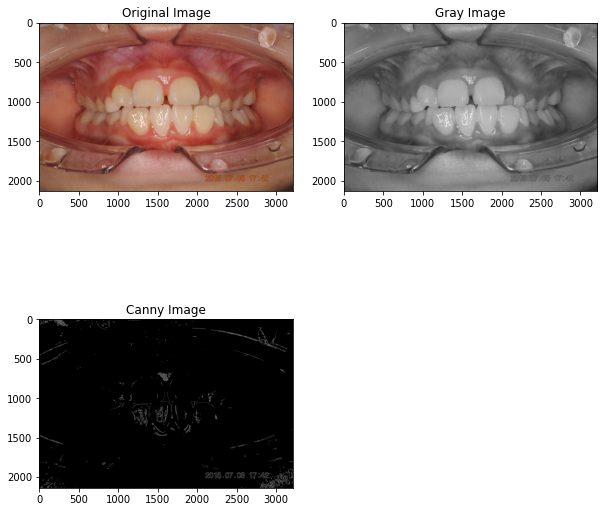

In [4]:
# Display Images
w, h = 10, 10
rows, cols = 2, 2

fig = plt.figure(figsize=(10, 10))

for i in range(0, rows * cols - 1):
    img = image_list[i]
    fig.add_subplot(rows, cols, i+1)
    if i > 0:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(img)
    plt.title(image_titles[i])


plt.show()


In [36]:
def display_images(rows, cols, images, images_titles, gray=True):
    fig = plt.figure(figsize=(12, 12))
    for i in range(0, rows * cols):
        img = images[i]
        fig.add_subplot(rows, cols, i+1)
        if gray:
            plt.imshow(img, cmap='gray')
        else:
            plt.imshow(img)
        plt.title(images_titles[i])
    
    plt.show()

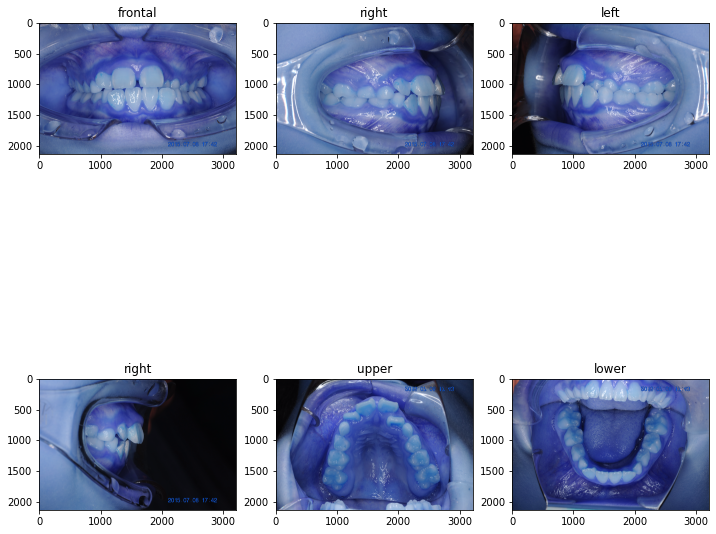

In [39]:
# Load first 6 images
images = []
for file_name in sorted(os.listdir(IMG_DIR))[:7]:
    if 'jpg' in file_name:
        images.append(cv2.imread(IMG_DIR + '/' + file_name))

images_views = ["frontal", "right", "left", "right", "upper", "lower"]

# Display images
display_images(rows=2, cols=3, images=images, images_titles=images_views, gray=True)

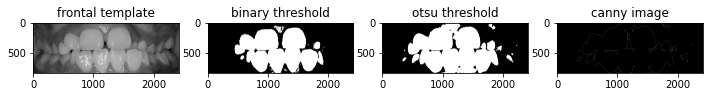

In [57]:
# 
TEMPLATE_DIR = 'templates/'


frontal_template = cv2.imread(TEMPLATE_DIR + 'frontal.jpg', 0)
blur = cv2.GaussianBlur(frontal_template, (7, 7), 0)

# binary threshold
_, th1 = cv2.threshold(frontal_template, 145, 255, cv2.THRESH_BINARY)

# otsu's threshold
_, th2 = cv2.threshold(blur, 145, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

canny_frontal_template = cv2.Canny(th2, 30, 200)

images = [frontal_template, th1, th2, canny_frontal_template]
images_titles = ["frontal template", "binary threshold", "otsu threshold", "canny image"]

display_images(rows=1, cols=len(images), images=images, images_titles=images_titles)

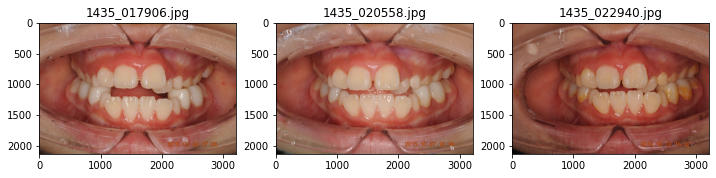

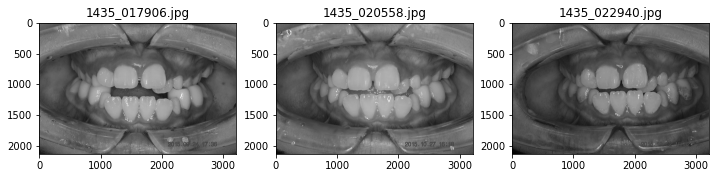

In [42]:
height, width = frontal_template.shape[:2]


# load example images
frontal_img_lists = ["1435_017906.jpg", "1435_020558.jpg", "1435_022940.jpg"]
frontal_img_titles = ["1435_017906.jpg", "1435_020558.jpg", "1435_022940.jpg"]

frontal_images = []
frontal_gray_images = []
for file_name in frontal_img_lists:
    image = cv2.imread(IMG_DIR + '/' + file_name)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    frontal_images.append(image)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    frontal_gray_images.append(image)

# display color images
display_images(rows=1, cols=3, images=frontal_images, images_titles=frontal_img_titles, gray=False)


# display gray images
display_images(rows=1, cols=3, images=frontal_gray_images, images_titles=frontal_img_titles)

In [48]:
import numpy as np 
import imutils

def draw_templatematching(gray_imgs, color_imgs):
    for i, image in enumerate(gray_imgs):
        found = None

        # loop over the scales of the image
        for scale in np.linspace(0.2, 1.0, 20)[::-1]:
            # resize the image according to the scale, and keep track
            # of the ratio of the resizing
            resized = imutils.resize(image, width=int(frontal_image.shape[1]*scale))
            ratio = image.shape[1]/float(resized.shape[1])

            if resized.shape[0] < height or resized.shape[1] < width:
                break
        
            # detect edges in the resized, gray scale image and apply template
            # matching to find the template in the image
            edged = cv2.Canny(image, 30, 200)
            result = cv2.matchTemplate(edged, canny_frontal_template, cv2.TM_CCOEFF)
            (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)

            #clone = np.dstack([edged, edged, edged])
            #cv2.rectangle(clone, (maxLoc[0], macLoc[1]),
                            #(maxLoc[0] + width, macLoc[1] + height), (0, 0, 255), 2)
            if found is None or maxVal > found[0]:
                found = (maxVal, maxLoc, ratio)
        
        (_, maxLoc, ratio) = found
        (startX, startY) = (int(maxLoc[0]*ratio), int(maxLoc[1]*ratio))
        (endX, endY) = (int((maxLoc[0] + width)*ratio), int((maxLoc[1] + height)*ratio))

        cv2.rectangle(color_imgs[i], (startX, startY), (endX, endY), (0, 255, 255), 10)

    return color_imgs
        

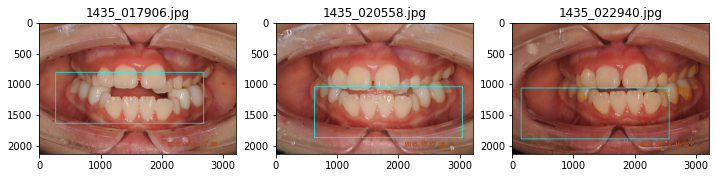

In [49]:
frontal_images = draw_templatematching(frontal_gray_images, frontal_images)
display_images(rows=1, cols=len(frontal_images), images=frontal_images, images_titles=frontal_img_titles)

In [ ]:
# test with right size face